In [17]:

import numpy as np
import pandas as pd
import h5py
from sklearn.ensemble import RandomForestClassifier
#We also consider to use tensorflow_decision_forests, however, we can't install it both in colab and local. 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
with h5py.File("dataset/full_dataset_vectors.h5", "r") as data:    
    # Split the data into training/test features/targets
    x_train = data["X_train"][:]
    y_train = data["y_train"][:]
    x_test = data["X_test"][:] 
    y_test = data["y_test"][:]


In [13]:
#Create a Gaussian Classifier
random_forest = RandomForestClassifier(n_estimators=500)
#Train the model using the training sets
random_forest.fit(x_train,y_train)


RandomForestClassifier(n_estimators=500)

In [14]:
#eval the model
y_pred=random_forest.predict(x_test)
print("Accuracy: ", random_forest.score(x_test,y_test))

Accuracy:  0.6755


In [16]:

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.761     0.918     0.832       170
           1      0.841     0.984     0.907       252
           2      0.756     0.509     0.608       232
           3      0.623     0.617     0.620       214
           4      0.521     0.677     0.589       220
           5      0.835     0.466     0.598       174
           6      0.623     0.569     0.595       174
           7      0.636     0.722     0.676       198
           8      0.634     0.612     0.623       178
           9      0.601     0.617     0.609       188

    accuracy                          0.675      2000
   macro avg      0.683     0.669     0.666      2000
weighted avg      0.685     0.675     0.670      2000



<AxesSubplot:>

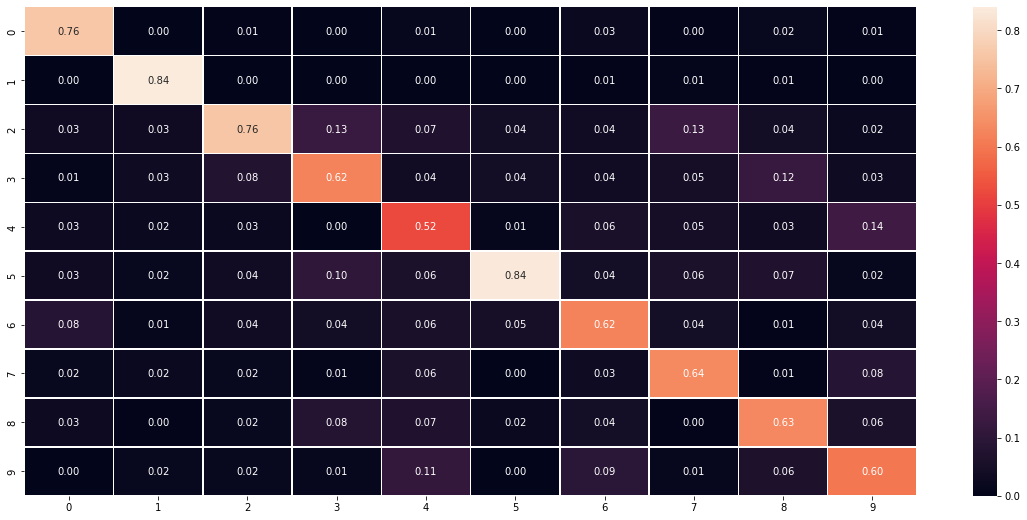

In [18]:

confusion_matrix_result = confusion_matrix(y_test , y_pred , normalize='pred')
df_cm = pd.DataFrame(confusion_matrix_result, index=range(10), columns=range(10))
plt.figure(figsize=(20, 9))
sns.heatmap(df_cm, annot=True, linewidths=0.5, fmt=".2f")